# Evolution of Pressureless Dust Universe

In cosmology, we generally deal with the expansion of universe. This is done using measurements of distant galaxies by telescopes to find certain useful parameters. In this problem you shall use the data in <font color ='redblue'>data.csv</font>, and analyse it to get the age of universe, according to a simplified Newtonian model.

To develop an understanding of how the expansion of the universe varies with time, imagine a universe filled with  “dust” of uniform density, &rho;(t), and choose an arbitrary point for the origin. Assume for the sake of simplicity that our Universe is both perfectly isotropic and homogeneous at all scales and the dust exerts no fluid pressure. This dust represents all of the matter in the universe after being homogenized and uniformly dispersed.

<strong>Note : </strong> We are only assuming matter density for our model, nothing exotic like dark energy for this simplified model!

The initial part just needs you to extract some necessary parameters from the given data


## Part 1
Given the data in file <font color ='redblue'>data.csv</font>, you have <strong>density parameter</strong> (&Omega;), which is basically the ratio of density of universe at a given time since the Big Bang to the critical density (you don't need to know any headache-inducing equations or complicated maths for this - just follow along the text), along with the error in its measurement that was done by a space telescope called WMAP. You also have time elapsed since beginning of the universe for that measurement.

This time is given in multiples of the Hubble Time, which is the reciprocal of Hubble constant (H<sub>0</sub> = 69.32 $\pm$ 0.8 km s<sup>-1</sup> Mpc<sup>-1</sup>)). Here Mpc is megaparsec, a common unit of length used for galactic distances.

First, plot the data given and look at how the curve roughly looks

In [15]:
pip install scipy

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

Text(0.5, 1.0, 'Age of the universe v/s Density Paramter')

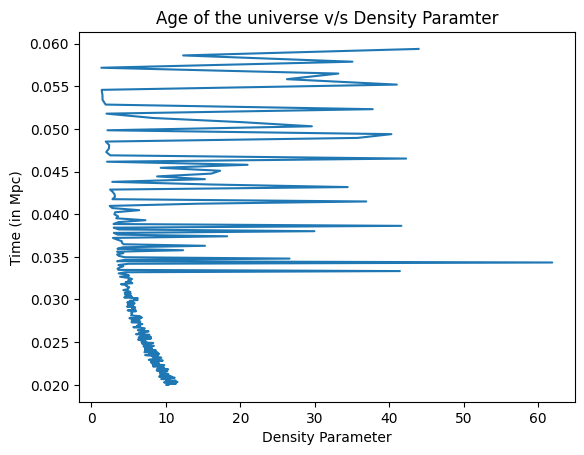

In [53]:
df = pd.read_csv('data.csv')

x = df['Density Parameter']
y = df['Time (in Mpc)']

plt.plot(x, y)
plt.xlabel('Density Parameter')
plt.ylabel('Time (in Mpc)')
plt.title('Age of the universe v/s Density Paramter')

Text(0.5, 1.0, 'Age of the universe v/s Error in density parameter')

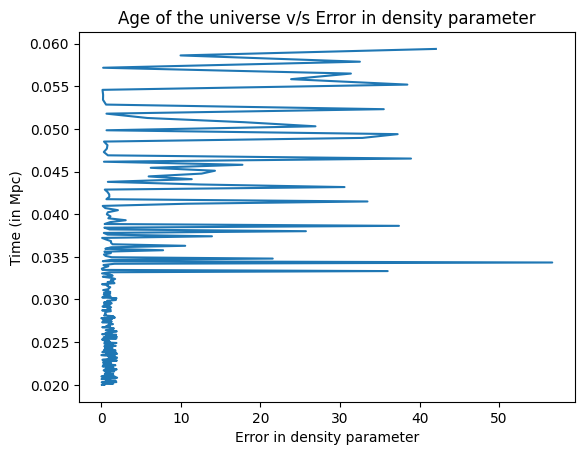

In [54]:
x = df['Error in density parameter']
y = df['Time (in Mpc)']

x_1 = df['Density Parameter']

theo_data = x_1 - x

plt.plot(x, y)
plt.xlabel('Error in density parameter')
plt.ylabel('Time (in Mpc)')
plt.title('Age of the universe v/s Error in density parameter')

Some of the points might seem all over the place. This happens because some measurements are very noisy and have significant errors. Try to mitigate this and plot a 'cleaner' curve of the two variables

Text(0.5, 1.0, 'Age of the universe v/s Error in density parameter')

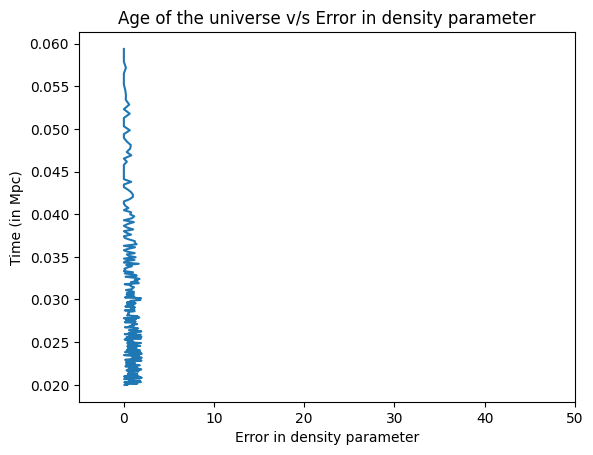

In [55]:
x = df['Error in density parameter']
y = df['Time (in Mpc)']

for i in range(0,len(x)):
  if (x[i]>2):
    x[i] = 0.0

plt.xlim(-5,50)
plt.plot(x, y)
plt.xlabel('Error in density parameter')
plt.ylabel('Time (in Mpc)')
plt.title('Age of the universe v/s Error in density parameter')

Text(0.5, 1.0, 'Age of the universe v/s Density Paramter')

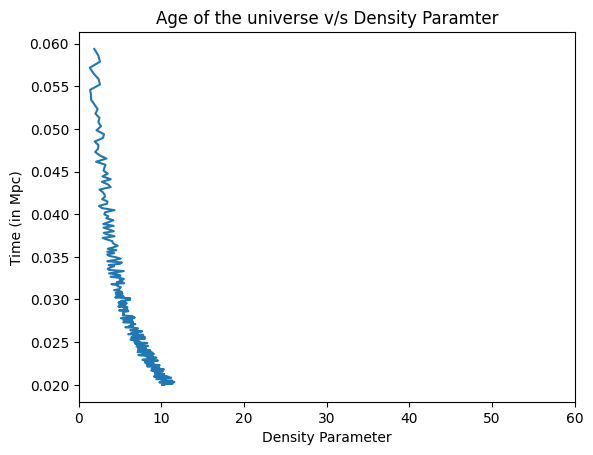

In [56]:
ohm = theo_data + x

plt.xlim(0,60)
plt.plot(ohm,y)
plt.xlabel('Density Parameter')
plt.ylabel('Time (in Mpc)')
plt.title('Age of the universe v/s Density Paramter')

## Part 2
<p> Now we move to the important part of the problem. Remember that  our model is taking only baryonic/matter density into account. The redshift $z$ is a parameter which tells us how fast a distant object is moving away from us due to expansion of Universe. Since light from distant objects takes long to reach us, we see an object at redshift $z$ as it appeared at a particular time $t$ in the past. We have the below relation that relates time elapsed since beginning of universe, $t$ at that redshift with the redshift $z$ and &Omega;. Here $t_h$ is the Hubble time (defined in part 1).  


$$
    \frac{t}{t_h}=
       \frac{\Omega}{2\sqrt{(\Omega - 1)^3}} \,\, \left(\,\,\cos^{-1} \left(\frac{\Omega z -\Omega+2}{\Omega z+\Omega}\right) - 2\frac{\sqrt{(\Omega-1)(\Omega z+1)}}{\Omega(1+z)}\,\,\right) \,\,\,\,\space \text{if } \Omega>1
$$
$$
    \frac{t}{t_h}=
       \frac{2}{3\sqrt{(1+z)^3}} \,\,\,\,\space \text{if } \Omega=1\\
$$
$$
  \frac{t}{t_h}=
       \frac{\Omega}{2\sqrt{(1-\Omega)^3}} \,\, \left( \,\, 2\frac{\sqrt{(1-\Omega)(\Omega z+1)}}{\Omega(1+z)}  - \cosh^{-1} \left(\frac{\Omega z -\Omega+2}{\Omega z+\Omega}\right)\right) \,\,\,\,\space \text{if } \Omega<1
$$

<p> Your task is to fit the distribution that you got, according to the above function and give the estimated value(s) for the unknown(s) in the above equation</p>

The optimal value of redshift obtained is: 1206


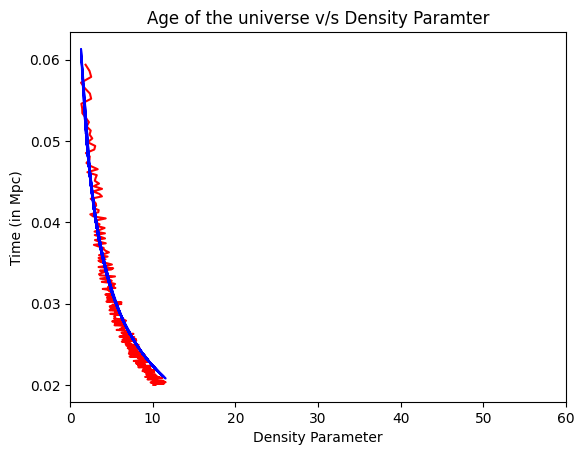

In [79]:
t_h = 4.44206e3 #Hubble time (in Mpc)

z_guess = np.arange(0,10000,1)  #possible range of redshift

t_theo = [0]*len(y)
z_lst = []
lms_lst = []
lms = 0

def find_min_index(lst):
  min_value = min(lst)
  min_index = lst.index(min_value)
  return min_index

for z in z_guess:
  for i in range (0,len(y)):
      if(ohm[i] > 1.0):
        t_theo[i] = t_h * (ohm[i]/(2*np.sqrt((ohm[i]-1)**3))) * (np.arccos((ohm[i]*z-ohm[i]+2)/(ohm[i]*z + ohm[i])) - 2*((np.sqrt((ohm[i]-1)*(ohm[i]*z+1)))/(ohm[i]*(1+z))))
      elif(ohm[i] == 1.0):
        t_theo[i] = (2*t_h/3)/np.sqrt((1+z)**3)
      else:
        t_theo[i] = t_h * (ohm[i]/2*np.sqrt((1-ohm[i])**3)) * ((2*np.sqrt((1-ohm[i])*(ohm[i]*z+1))/(ohm[i]*(1+z))) - np.arccosh((ohm[i]*z-ohm[i]+2)/(ohm[i]*z+ohm[i])))
      lms = lms + (t_theo[i] - y[i])**2

  lms_lst.append(lms)
  z_lst.append(z)
  lms = 0

min_index = find_min_index(lms_lst)
z_opt = z_lst[min_index]

for i in range (0,len(y)):
  if(ohm[i] > 1.0):
    t_theo[i] = t_h * (ohm[i]/(2*np.sqrt((ohm[i]-1)**3))) * (np.arccos((ohm[i]*z_opt-ohm[i]+2)/(ohm[i]*z_opt + ohm[i])) - 2*((np.sqrt((ohm[i]-1)*(ohm[i]*z_opt+1)))/(ohm[i]*(1+z_opt))))
  elif(ohm[i] == 1.0):
    t_theo[i] = (2*t_h/3)/np.sqrt((1+z_opt)**3)
  else:
    t_theo[i] = t_h * (ohm[i]/2*np.sqrt((1-ohm[i])**3)) * ((2*np.sqrt((1-ohm[i])*(ohm[i]*z_opt+1))/(ohm[i]*(1+z_opt))) - np.arccosh((ohm[i]*z_opt-ohm[i]+2)/(ohm[i]*z_opt+ohm[i])))

plt.xlim(0,60)
plt.plot(ohm, y, color = 'r')
plt.plot(ohm, t_theo, color = 'b')
plt.xlabel('Density Parameter')
plt.ylabel('Time (in Mpc)')
plt.title('Age of the universe v/s Density Paramter')
print('The optimal value of redshift obtained is: ' + str(z_opt))

<p>After doing the above estimation, we can now delve into theoretical aspect to answer some questions about our model of universe.
    
In cosmology, we define distance between two points in terms of scale fator $a$ and comoving distance ($R_{cov}$) as given below</p>


$$
R(t) = a(t)R_{cov}
$$

<p>Now just like we defined our model by assuming it a spherical shell filled with dust, consider a thin shell at a distance $R(t)$ at a point of time $t$, from the arbitrary origin that we took (centre of the sphere). Assuming that $R_{cov}$ isn't changing with time, first try to evaluate the recessional velocity (velocity at which the dust is moving radially away from the centre). Compare that expression with the below given Hubble's formula and write down its expression

$$
V_{rec} = H \times R(t)
$$

The recessional velocity of the dust is given by

$$
v(t) = \dot{a}(t) R_{cov} \\
v(t) = \frac{\dot{a}(t)}{a(t)}R(t)
$$   

where $\frac{\dot{a}(t)}{a(t)}$ is equivalent to the Hubble's parameter ($H$) in Hubble's formula.

<p>Then, for this shell considering expansion, try to apply conservation of total energy and derive the critical density expression in terms of Hubble's constant and gravitational constant $G$</p>

The gravitational binding energy of a solid sphere of uniform density is given by
$$
U = -\frac{3}{5}\frac{GM^{2}}{R}
$$
Substituting $M = \rho \frac{4}{3}\pi R^{3}$, we get
$$
U = -\frac{16}{15} \pi^{2}GR^{5}\rho^{2}
$$
Now consider the kinetic energy associated with a thin spherical shell of differential thickness $dr$ at radial distance $r$
$$
dK = \frac{1}{2}4\pi r^{2} \rho v^{2} dr
$$
From previous analysis, we know that the recessional velocity depends on the radial distance as $v = Hr$, where $H = \dot{a}(t)/a(t)$. Substituting this in the expression for KE, we get
$$
dK = 2\pi \rho H^{2}r^{4}dr
$$
Therefore, the total KE associated with the expanding sphere at any instant is
$$
K = \frac{2}{5} \pi \rho H^{2}R^{5}
$$
The total energy associated with the expanding sphere is given by
$$
E = U + K = -\frac{16}{15} \pi^{2}GR^{5}\rho^{2} + \frac{2}{5} \pi \rho H^{2}R^{5}
$$
The system described above is bound if and only if $E < 0$. So, the critical density, $\rho_{crit}$ can be found by setting $E = 0$.
$$
\rho_{crit} = \frac{3H^{2}}{8G}
$$

<p>Now we define our system as bounded, unbounded or open. These terms are related to the expansion and energy of the system ($E$) contained inside the shell of our model. Now if you derived the above expression, you must have encountered expression of energy of the dust ensemble (i.e. our modelled Universe), then assuming other terms in expression of energy positive and not dependent on &Omega;, evaluate the energy expression and compare it with the function given below to find what $x$ is in terms of the earlier parameters

$$
E \propto sgn(x)
$$

Closed universe if $E < 0$
    
Open universe if $E > 0$

Flat universe if $E = 0$

From this, if we assume that the average density of a universe is twice the critical density, comment on the boundedness of the universe, and calculate the age of the universe for the estimated redshift, using the plot that you got and equations given earlier.

From previous analysis, we get
$$
E = -\frac{16}{15} \pi^{2}GR^{5}\rho^{2} + \frac{2}{5} \pi \rho H^{2}R^{5} \\
E \propto sgn(\frac{3H^{2}}{8G}-\rho) \\
E \propto sgn(\rho_{crit}-\rho)
$$

For an average density that is twice the critical density, the universe is bounded/closed, since $E < 0$.

In [85]:
ohm = 2.0
t = t_h * (ohm/(2*np.sqrt((ohm-1)**3))) * (np.arccos((ohm*z_opt-ohm+2)/(ohm*z_opt + ohm)) - 2*((np.sqrt((ohm-1)*(ohm*z_opt+1)))/(ohm*(1+z_opt))))
t = "{:.4f}".format(t)
print('The age of the universe at the estimated redshift is: ' + str(t) + 'Mpc')

The age of the universe at the estimated redshift is: 0.0499Mpc
